**Immigration to Canada from Eastern Europe during 1980 - 2013**

Bubble plot

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
#also needed: openpyxl (install by pip)

In [2]:
from dataset import *

                    Continent          Region  1980  1981  1982  1983  1984  \
Country                                                                       
Poland                 Europe  Eastern Europe   863  2930  5881  4546  3588   
Romania                Europe  Eastern Europe   375   438   583   543   524   
Russian Federation     Europe  Eastern Europe     0     0     0     0     0   
Ukraine                Europe  Eastern Europe     0     0     0     0     0   
Bulgaria               Europe  Eastern Europe    24    20    12    33    11   
Hungary                Europe  Eastern Europe   205   310   397   337   310   
Republic of Moldova    Europe  Eastern Europe     0     0     0     0     0   
Belarus                Europe  Eastern Europe     0     0     0     0     0   
Slovakia               Europe  Eastern Europe     0     0     0     0     0   
Czech Republic         Europe  Eastern Europe     0     0     0     0     0   

                     1985  1986  1987  ...  2005  2

c:\Users\krzys\Desktop\venv\Projekty\01-Immigration_CA\dataset.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['Total'] = dataset.sum(axis=1)


In [3]:
datasetEE.head()  # print the original df for ease of tracking changes

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Poland,Europe,Eastern Europe,863,2930,5881,4546,3588,2819,4808,6931,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Romania,Europe,Eastern Europe,375,438,583,543,524,604,656,1202,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Russian Federation,Europe,Eastern Europe,0,0,0,0,0,0,0,0,...,3972,3117,2983,2690,2931,2288,1963,2079,2466,63344
Ukraine,Europe,Eastern Europe,0,0,0,0,0,0,0,0,...,2270,1973,2218,1937,2367,3159,2515,2265,2487,51410
Bulgaria,Europe,Eastern Europe,24,20,12,33,11,24,33,52,...,1738,1419,1172,994,784,556,365,451,512,23310


**Analysis**

In [4]:
# Prepare data for bubble plot, immigration to Canada from Ukraine and Russia

years = list(map(str, range(1990, 2014)))  # immigration from UA and RU started in 1992 

df_EE_t = datasetEE[years].transpose()

df_EE_t.index = map(int, df_EE_t.index)

df_EE_t.index.name = 'Year'

df_EE_t.reset_index(inplace=True)  # need it back as a column

df_EE_t.head(10)

Country,Year,Poland,Romania,Russian Federation,Ukraine,Bulgaria,Hungary,Republic of Moldova,Belarus,Slovakia,Czech Republic
0,1990,17040,2252,0,0,172,780,0,0,0,0
1,1991,16028,2337,0,0,611,775,0,0,1,1
2,1992,12145,3147,172,103,1116,795,20,12,0,0
3,1993,6960,3676,906,761,965,603,70,40,113,107
4,1994,3550,3495,1327,1289,687,349,225,114,103,155
5,1995,2405,4279,1819,1751,762,306,273,118,143,128
6,1996,2136,3909,2640,2684,825,364,230,156,232,149
7,1997,1758,3993,3708,2518,732,319,294,349,236,182
8,1998,1488,3033,4388,2702,779,337,216,540,289,206
9,1999,1354,3538,4053,2836,832,408,199,426,500,524


In [5]:
# Analysis of Ukraine and Russia

# Feature scaling normalization
norm_ua = (df_EE_t['Ukraine'] - df_EE_t['Ukraine'].min()) / (df_EE_t['Ukraine'].max() - df_EE_t['Ukraine'].min())

norm_ru = (df_EE_t['Russian Federation'] - df_EE_t['Russian Federation'].min()) / (df_EE_t['Russian Federation'].max() - df_EE_t['Russian Federation'].min())

**Bubble plot**

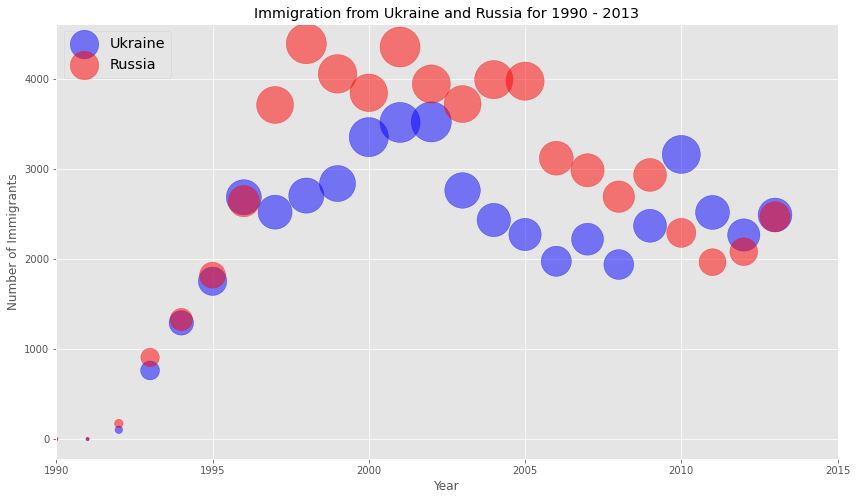

In [7]:
# Ukraine
ax0 = df_EE_t.plot(kind='scatter', x='Year', y='Ukraine', figsize=(14,8), alpha=0.5, color='blue', \
    s=norm_ua * 1600 + 10, xlim=(1990, 2015))

# Russia
ax1 = df_EE_t.plot(kind='scatter', x='Year', y='Russian Federation', alpha=0.5, color='red', \
    s=norm_ru * 1600 + 10, ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Ukraine and Russia for 1990 - 2013')
ax0.legend(['Ukraine', 'Russia'], loc='upper left', fontsize='x-large')

**Comment**

"The voluntary emigration from Russia began to gain momentum in the late 1980s after the country had loosened its emigration regime and departure registration procedures. Until 1989, virtually no free emigration from the USSR was possible. After the year 1989 exceptions were made for emigration of ethnic Germans, Jews, and Greeks. There was a considerable increase of emigration starting from January 1,
1993, when entry and exit rules were liberalized (i.e., the date the Law on Entry and Exit, adopted earlier by the USSR People's Deputies, came into force). The Russian Constitution of 1993 also stipulated the right of citizens to freely leave the Russian Federation and the right to return to the country (‘Everyone may freely leave the Russian Federation. The Russian citizens shall have the right to freely return to the Russian Federation’)."

Source: https://www.sociostudies.org/upload/sociostudies.org/journal/seh/2018_2/140-155.pdf as at 30/07/2022

Ukarine became independent from the Soviet Union on 24 August 1991. The same year, on 31 December, the Soviet Union was dissolved. This enabled migration both into the country and out of it.

Source: https://link.springer.com/chapter/10.1007/978-3-319-41776-9_2 as at 30/07/2022